In [1]:
!pip install opencv-python
!pip install Pillow

In [27]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [58]:
root_img = 'Images//1.png'
mask_pred = 'Masks//1.tif'
thresh = 100

In [59]:
import os
folder_path = 'Masks'  
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    for file_name in files:
        print(file_name)
else:
    print(f"The folder '{folder_path}' does not exist.")


0.tif
1.tif
10.tif
100.tif
1000.tif
1001.tif
1002.tif
1003.tif
1004.tif
1005.tif
1006.tif
1007.tif
1008.tif
1009.tif
101.tif
1010.tif
1011.tif
1012.tif
1013.tif
1014.tif
1015.tif
1016.tif
1017.tif
1018.tif
1019.tif
102.tif
1020.tif
1021.tif
1022.tif
1023.tif
1024.tif
1025.tif
1026.tif
1027.tif
1028.tif
1029.tif
103.tif
1030.tif
1031.tif
1032.tif
1033.tif
1034.tif
1035.tif
1036.tif
1037.tif
1038.tif
1039.tif
104.tif
1040.tif
1041.tif
1042.tif
1043.tif
1044.tif
1045.tif
1046.tif
1047.tif
1048.tif
1049.tif
105.tif
1050.tif
1051.tif
1052.tif
1053.tif
1054.tif
1055.tif
1056.tif
1057.tif
1058.tif
1059.tif
106.tif
1060.tif
1061.tif
1062.tif
1063.tif
1064.tif
1065.tif
1066.tif
1067.tif
1068.tif
1069.tif
107.tif
1070.tif
1071.tif
1072.tif
1073.tif
1074.tif
1075.tif
1076.tif
1077.tif
1078.tif
1079.tif
108.tif
1080.tif
1081.tif
1082.tif
1083.tif
1084.tif
1085.tif
1086.tif
1087.tif
1088.tif
1089.tif
109.tif
1090.tif
1091.tif
1092.tif
1093.tif
1094.tif
1095.tif
1096.tif
1097.tif
1098.tif
1099.tif
1

(728, 470)


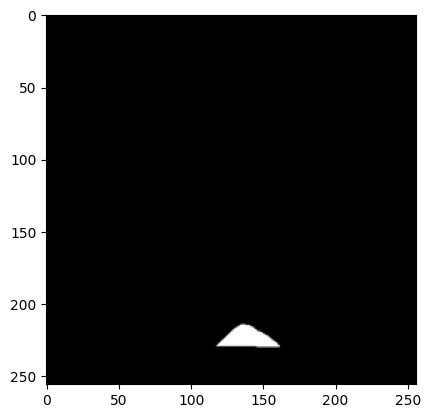

In [60]:
from PIL import Image
import numpy as np

thresh = 100

img = Image.open(mask_pred).convert('RGB')
print(img.size)

if img.size != (256, 256):
    img = img.resize((256, 256))

img = np.reshape(img, (256, 256, 3))

img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(img)
plt.show()

Find contours and detect nt point

In [62]:
def drawLine(img, Vx, Vy, Px, Py):
    _, cols = img.shape[:2]
    lefty = int((-Px*Vy/Vx) + Py)
    righty = int(((cols-Px)*Vy/Vx)+Py)
    cv2.line(img, (cols-1, righty), (0, lefty), (0, 255, 0), 1)

In [63]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

[fit_line_vx, fit_line_vy, fit_line_x, fit_line_y] = cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)

percentage_line_vx, percentage_line_vy = -fit_line_vy, fit_line_vx

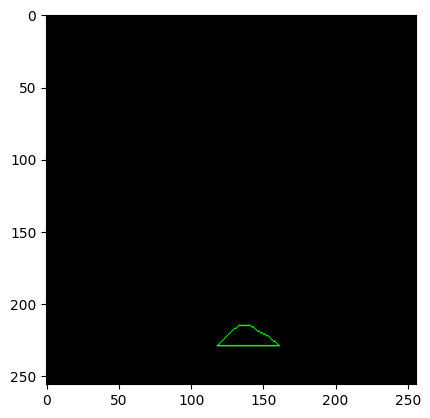

In [64]:
img_contours_mask = np.zeros(img.shape, np.uint8)
contour_img = np.zeros(img.shape, np.uint8)

cv2.drawContours(img_contours_mask, contours, -1, (0, 255, 0), 1)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

plt.imshow(img_contours_mask)
plt.show()

In [65]:
centroid = []
for c in contours:
    m = cv2.moments(c)
    centroid.append(int(m['m10']/m['m00']))
    centroid.append(int(m['m01']/m['m00']))
    x, y, w, h = cv2.boundingRect(c)
    break
print(centroid)

[138, 223]


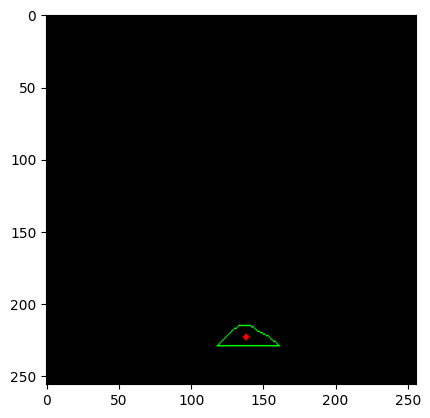

In [66]:
# draw centroid
cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
plt.imshow(img_contours_mask)
plt.show()

Text(0.5, 1.0, 'Centroid')

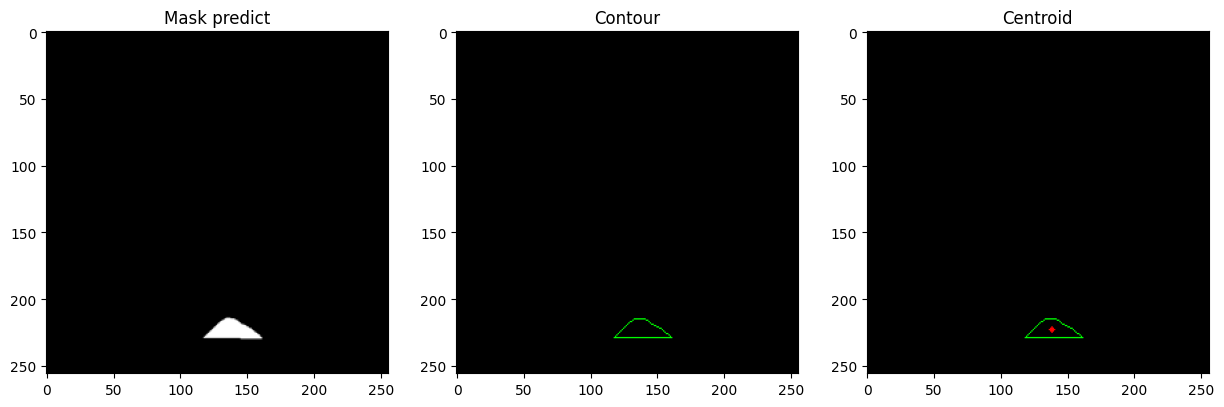

In [67]:
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img)
arr[0].set_title('Mask predict')
arr[1].imshow(contour_img)
arr[1].set_title('Contour')
arr[2].imshow(img_contours_mask)
arr[2].set_title('Centroid')

C:\Users\sreec\AppData\Local\Temp\ipykernel_3016\1171190275.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-Px*Vy/Vx) + Py)
C:\Users\sreec\AppData\Local\Temp\ipykernel_3016\1171190275.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-Px)*Vy/Vx)+Py)


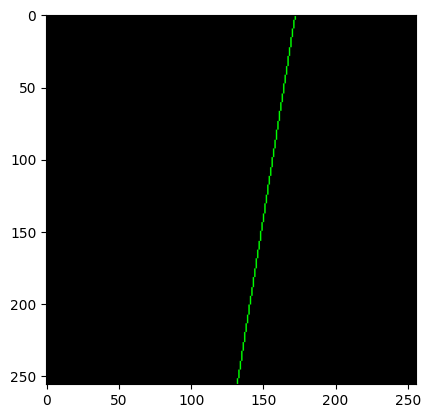

In [68]:
line_mask = np.zeros(img.shape, np.uint8)
drawLine(line_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imshow(line_mask)
plt.show()

In [69]:
img_contours_mask = np.array(img_contours_mask)
line_mask = np.array(line_mask)

rows, cols, _ = img.shape
nt_points = []

for i in range(0, rows):
    for j in range(0, cols):
        if img_contours_mask[i][j][1] == 255 and line_mask[i][j][1] == 255:
            nt_points.append([i, j])

print('len: ', len(nt_points))
print('nt_points: ', nt_points)

len:  2
nt_points:  [[215, 138], [229, 136]]


C:\Users\sreec\AppData\Local\Temp\ipykernel_3016\1171190275.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-Px*Vy/Vx) + Py)
C:\Users\sreec\AppData\Local\Temp\ipykernel_3016\1171190275.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-Px)*Vy/Vx)+Py)


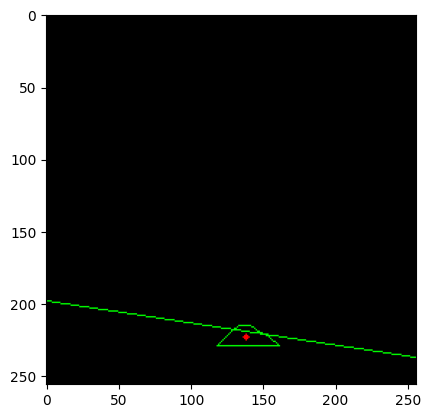

In [70]:
drawLine(img_contours_mask, fit_line_vx, fit_line_vy, fit_line_x, fit_line_y)
plt.imshow(img_contours_mask)
plt.show()

C:\Users\sreec\AppData\Local\Temp\ipykernel_3016\1171190275.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-Px*Vy/Vx) + Py)
C:\Users\sreec\AppData\Local\Temp\ipykernel_3016\1171190275.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-Px)*Vy/Vx)+Py)


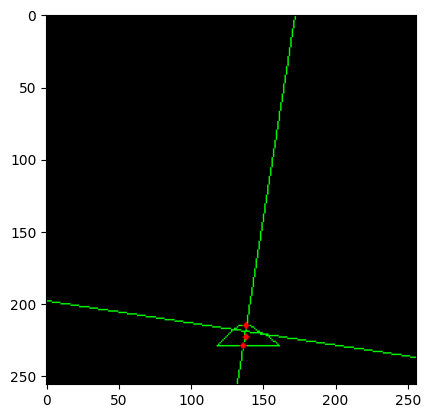

In [71]:
drawLine(img_contours_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])

cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
cv2.circle(img_contours_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(img_contours_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)

plt.imshow(img_contours_mask)

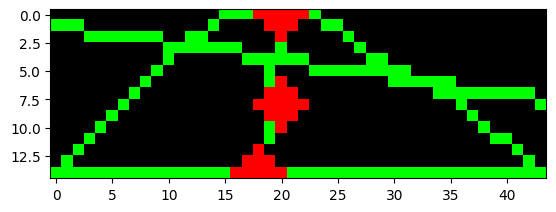

In [72]:
ROI = img_contours_mask[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()

In [73]:
root_image_path = 'Images//1.png'
root_img = Image.open(root_image_path)
root_img = root_img.resize((256, 256))

In [74]:
root_img = cv2.imread('Images//1.png')
nt_mask = np.zeros(img.shape, np.uint8)

# visualize nt_mask
cv2.drawContours(nt_mask, contours, -1, (0, 255, 0), 1)
cv2.circle(nt_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(nt_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
cv2.line(nt_mask, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

# visualize root_img
cv2.drawContours(root_img, contours, -1, (0, 255, 0), 1)
cv2.circle(root_img, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(root_img, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
cv2.line(root_img, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

print(nt_points)
print('done!')

[[215, 138], [229, 136]]
done!


In [75]:
from PIL import Image

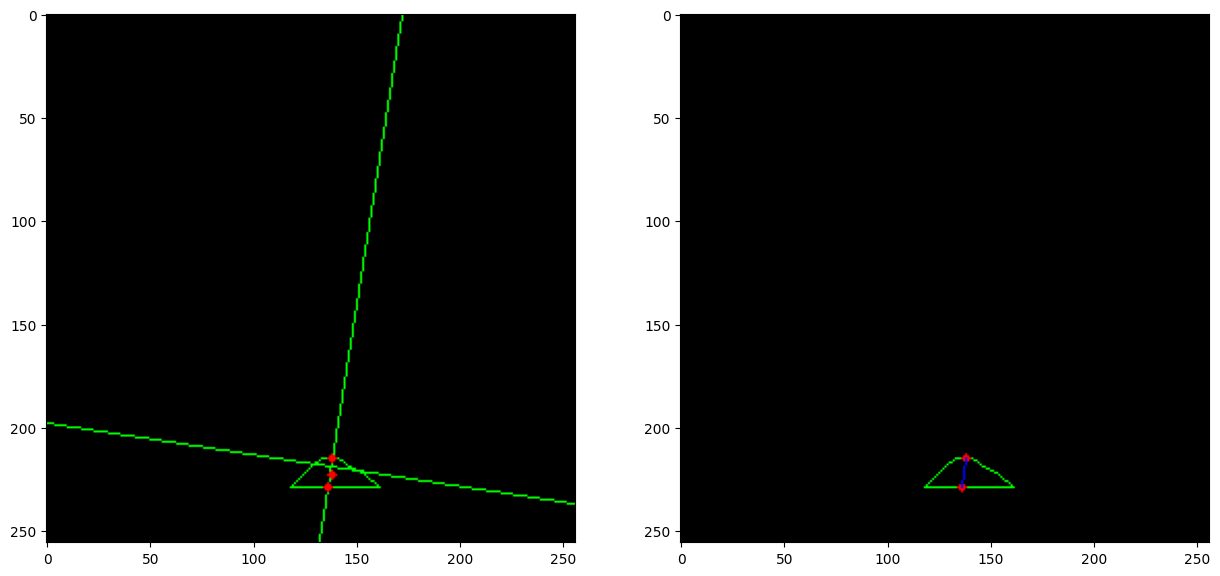

In [76]:
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(img_contours_mask)
arr[1].imshow(nt_mask)
#arr[2].imshow(root_img)

In [77]:
DPI = [200, 250, 300, 350]

inch_to_mm = 25.4

def mDistance(x1, y1, x2, y2):
    return ((((x1 - x2)/DPI[0])**2 + ((y1 - y2)/DPI[0])**2)**0.5)*inch_to_mm

(x1, y1, x2, y2) = (nt_points[0][0], nt_points[0][1], nt_points[1][0], nt_points[1][1])

nt1 = round(mDistance(x1, y1, x2, y2), 3)
print('nt1: ', nt1, 'mm')

nt1:  1.796 mm


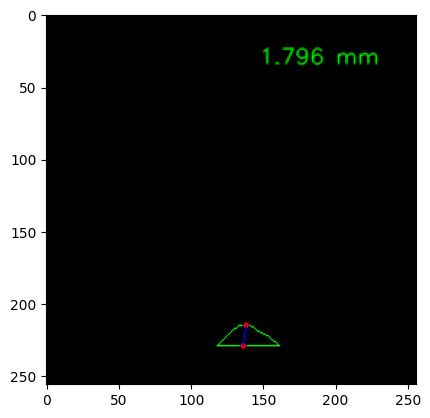

In [78]:
x = round((x1 + x2)/2)
y = round((y1 + y2)/2)
image = cv2.putText(nt_mask, str(nt1) + ' mm', (y + 10, 256 - x), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(image)